# Spectral analysis assignment

In this assignment you will perform a set of operations involving spectra.  

**This assignment is due at noon on September 13.**  Your final version needs to be uploaded to your github repository by this time.

By the end of this activity you will have learned how to do the following things:
* Read in spectral files for stars
* determine the dispersion of the spectrograph in Angstrom/pixel
* plot the spectra of three stars
* measure $f_\lambda$ of each star at a specific wavelength.
* Given a frequency, derive $f_\nu$ at that frequency
* plot the filter curve of the B and V filters on top of the stellar spectra
* Calculate the B-V color of each star by convolving the spectrum with the appropriate filter curves.  compare to the published values.  During this step you will do the following calculations:
  * measure the magnitude using the central flux in each filter
  * Figure out your own way to estimate the color more accurately using the filter curve
  * repeat the same procedure using the speclite library to get the "correct" answer.
  * comment on the differences
  
Places where you need to fill in code will be indicated with a `#### Write code here`.  If the part you have to enter is in the middle of a block of code the area that ends where you have to enter code will end with `#----` Some of these will not be directly linked to points because they are simply bookkeeping things that depend on your own computer.  Other sections that specify specific problems will be indicated with a 
### Problem
statement.  Please read everything carefully to find all the places you will need to enter code


## The spectral library

We will be using the <a href=https://www.noao.edu/cflib/>"Indo-US Spectral Atlas" </a> of bright stars.  I have downloaded three stellar spectra and they are included in my github repository.

In some of the code below, the explanation will be in the commented text within the code block, so make sure to read all of it.

## Importing modules, packages, and libraries

The first step will be to import the necessary components.

In [1]:
#This library stores filter response curves and contains functions to convolve them with spectra
import speclite.filters                         

#the library that allows you to read, store, and manipulate tables
from astropy.table import Table

#Pyplot is what we will use to make many of our plots.
from matplotlib import pyplot as plt

#allows you to execute commands directly to the operating system
import os           

#this is a useful python module that allows you to assign explicit units to numbers that 
#python uses to handle unit conversions and to perform calculations.  It can be a little
#hard to get used to but is very useful once you learn how to use it.
from astropy import units as u

#built-in physical constants
from astropy import constants as c

import numpy as np

## Reading in the Files 

The next step will be to read in the files.  I encourage you to open each of the \*.txt files that contain the stellar spectra.  We will read each text file into an "astropy Table".  These are described at https://docs.astropy.org/en/stable/table/index.html and are a useful way to read in and store text data.

### Problem
Complete the missing sections of the code.

In [17]:
#Use an OS command to get the path to your home directory
homedir = os.getenv("HOME")

#here you will need to specify the directory tree that points to your spectrum files.  
#This directory starts in your home directory so you don't need to type, e.g.  /home/<username>/
#### Write code here
specdir = homedir+'/Work/Teaching/Classes/Astro_596/Fall_2021/Computer_projects/ASTR596_F21_project_workspace/Stellar-spectral-analysis/'

#this moves you to specdir so that you don't need to specify the path every time you read in a file.
os.chdir(specdir)

#this command reads the wavelength and flux of 95418.txt into a variable called star1.  
#The 'names' kwarg specifies the names of the columns
star1 = Table.read('95418.txt',format='ascii', names=('lambda','flam'))
display(star1)               #display the value of the table

#Now I would like you to read 58946.txt into a variable 'star2' and 165341.txt into a variable called star3.  
#Display the values for each table
#### Write code here
star2 = Table.read('58946.txt',format='ascii', names=('lambda','flam'))
star3 = Table.read('165341.txt',format='ascii', names=('lambda','flam'))
display(star2)               #display the value of the table
display(star3)               #display the value of the table

#scale the flux of each star to have the same flux as Vega at 5500 Ang.
#At 5500 Ang, Vega has a flux of 3.44x10^(-9) erg/s/cm^2/Ang
#########remember that if you rerun your jupyter notebook that this operation will 
#########be executed over and over again.
fvega5500 = 3.44e-9
star1['flam'] *= fvega5500
star2['flam'] *= fvega5500
star3['flam'] *= fvega5500

lambda,flam
float64,float64
3465.0,0.9348064
3465.4,0.9298626
3465.8,0.9295582
3466.2,0.9163543
3466.6,0.9428962
3467.0,0.9729065
3467.4,0.9731162
3467.8,0.965655
3468.2,0.9507776


lambda,flam
float64,float64
3465.0,0.7409257
3465.4,0.7233897
3465.8,0.7123032
3466.2,0.7190819
3466.6,0.7366779
3467.0,0.7559793
3467.4,0.7700326
3467.8,0.7757329
3468.2,0.7665706


lambda,flam
float64,float64
3465.0,0.3538652
3465.4,0.2905372
3465.8,0.2453179
3466.2,0.2475912
3466.6,0.2801426
3467.0,0.3293486
3467.4,0.373181
3467.8,0.3981356
3468.2,0.4190642


## Compute the dispersion of the spectra

### Problem

Using the print outs of the spectra above, enter the dispersion of each spectrum.  That is, what is the spacing in Angstroms between each adjacent flux point?

**Enter your answers here**
* star 1: 
* star 2: 
* star 3:


## Plot the spectra 

### Problem
Here you will plot the spectrum of the stars.  I will plot the first one and you will plot the others.  Note that the stars all have flambda=1 at 5500 Angstroms.  This is because the authors of the spectral atlas normalized the spectra this way.  Therefore the absolute values of the flux aren't in physical units but arbitrary ones. However, the relative fluxes are fine.  In the first part of the code I will scale all of the spectra to have the same flux as Vega at 5500 Ang.

See https://matplotlib.org/stable/tutorials/introductory/pyplot.html for a tutorial on using pyplot in matplotlib to make nice plots.

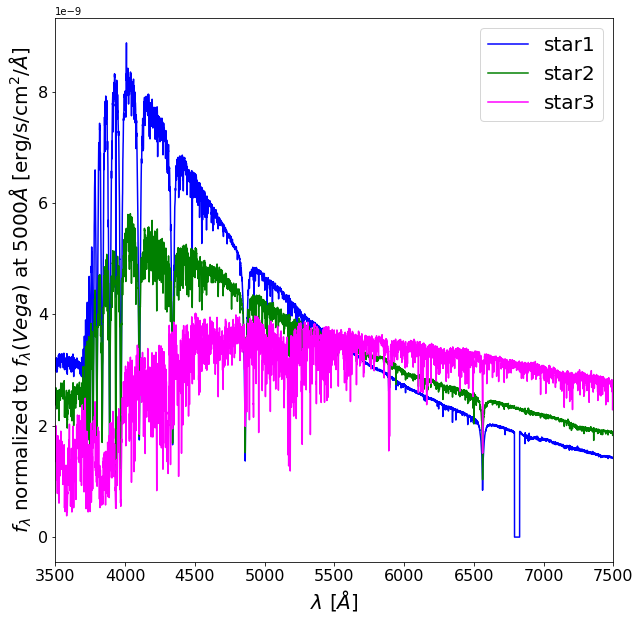

In [18]:
# use pyplot to plot each star
#this initializes a figure with a given size
plt.figure(figsize=(10,10))
#this plots the wavelength and flux of the star, makes the color of the line blue, 
#and sets the label in the legend to say "star1"
plt.plot(star1['lambda'],star1['flam'], color='blue', label='star1')

#this sets the x-range of the plot.  The y-range is scaled automatically
plt.xlim([3500,7500])

#Now I want you to plot the other two stars in the same way, 
#with star 2 plotted in green and star 3 in magenta.  Make sure to include the name of the 
#star in the legend label
#### Write code here
plt.plot(star2['lambda'],star2['flam'], color='green', label='star2')
plt.plot(star3['lambda'],star3['flam'], color='magenta', label='star3')

#----

#this provides x and y-axis labels.  The "size" command gives the size of the font
plt.xlabel('$\lambda$ [$\AA$]',size=20)
plt.ylabel('$f_\lambda$ normalized to $f_\lambda(Vega)$ at 5000$\AA$ [erg/s/cm$^2/\AA$]', size=20)

#this sets the tick size to be easily readable
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#this plots the legend and sets the size of the text in the legend
plt.legend(fontsize=20)

#this causes the plot to display
plt.show()

### Problem
Comment on the differences and similarities between the three spectra.  Write your answer in an empty markdown below this one. *Note: the strange dip in the blue spectrum at ~6800 is from the instrument and not the star.*

## Boolean arrays and where commands - A way to access a given set of elements in an array

<font color='red'> maybe move this later one to where student estimate the magnitude</font>

If you have an array, you can perform queries based on values of that array.  These queries return "Boolean arrays", which will contain True or False values depending on whether the element of the array meets the criteria.  You can then use these Boolean arrays to only access the value you would

In [4]:
#this example shows you how to create and use a boolean array witha single argument
a = np.array([1,2,3,4,5])           #create an array
#perform a query.
#I always end the the output of a Boolean query out with "flag" so that I know it's a 
#Boolean array
asmallflag = a < 4           

#you can see that only the first three elements of asmall are "True"
print('A boolean array that selects small a values:', asmallflag)

#now using 'abig' as an array of indices for 'a' you can print out only the elements of a 
#that meet your query, that is, those that have True indices
print('Only the elemens of a for which the query yielded a True:', a[asmallflag])

#Now let's make a second array with the same length as a
b = np.array(['aa','bb','cc','dd','ee'])

# in this case, b could be names of object in a table and a could be some value associated 
#with those objects.  Since they have the same length, same order, **and** refer to the same set of data
#we can apply the 'abig' Boolean array to find out which elements of b are selected when we 
#perform our query on a
print('Only the elements of b that were selected by the previous query:', b[asmallflag])

#that's pretty cool!  But wait, there's more
#you can also make Boolean arrays by combining different conditions.  You can do this two different
#wasy.  
#First, you can set up a single query with two conditions, each enclosed in ()
amidflag = (a>2) & (a<4)
print('The elements of a and b that meet the new criteria: ', a[amidflag], b[amidflag])

#but I can also make individual Boolean arrays and combine them with a logical AND (&) command.
#Only elements that are True in both input arrays are true in the output array
abigflag = a>2
amidflag2 = abigflag & asmallflag
print('The results of combining the two previous selections:',amidflag2, a[amidflag2])

#and finally, we can assign only the values that satisfy a boolean command to a new arraw.
#in this case, only values of a with True indicies in amidflag2 will be assigned to c
onlymidvalues = a[amidflag2]
print(c)

#in the exercise below, we will use this technique to print out the flux at a point
#on the spectrum with a given wavelength

A boolean array that selects small a values: [ True  True  True False False]
Only the elemens of a for which the query yielded a True: [1 2 3]
Only the elements of b that were selected by the previous query: ['aa' 'bb' 'cc']
The elements of a and b that meet the new criteria:  [3] ['cc']
The results of combining the two previous selections: [False False  True False False] [3]
<module 'astropy.constants' from '/Users/grudnick/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/constants/__init__.py'>


## Measure the monochromatic flux density of each star at 4500 Angstroms

You will now need to find the closest flux point to the one at 4500 angstroms and print it out.  This will be the monochromatic flux density in flambda.

### Problem 
In the following code block you will need to write code that allows you to:
1. retrieve flambda from each spectrum at 2 reference wavelengths of 4500 and 6500 Angstroms;
2. calculate fnu at each of these reference wavelengths;
3. comment on the relative values at each wavelength.

In [40]:
#these are the reference wavelengths in angstroms
lamref1 = 4500.0
lamref2 = 6500.0

#to select a given wavelength we will make a new array 
#that is filled with the absolute value of the difference between the reference wavelength 
#and our wavelength array.  
star1_difflam_ref1 = abs(star1['lambda'] - lamref1)

#now we assume that 
#now find the wavelength that is closest to lamref1 by using the 'argmin' function in python
#which returns the index that corresponds to the minimum value
minind_star1_difflam_ref1 = np.argmin(star1_difflam_ref1)

#now we can use this number to find the wavelength and flux closest to the reference 
#wavelength by adding on a second index field
#we assign these values to two new variables.
flam_star1_lamref1 = star1['flam'][minind_star1_difflam_ref1]
star1_lamref1 = star1['lambda'][minind_star1_difflam_ref1]

print('flam of star1 at', star1_lamref1, 'Angstroms = ', star1['flam'][minind_star1_difflam_ref1])

#### Write code here
#now I want you to make similar print statements for flambda at both reference 
#wavelengths for all three stars.  Treat every star's wavelength array as different as you 
#don't know if they all have the same length.

#Also make sure you print them out in a way that is easy for me to understand.  You 
#can use my code as a template.

#construct the wavelength difference array for all the star and reference wavelength combinations.
star1_difflam_ref1 = abs(star1['lambda'] - lamref1)             #star 1, lambda 1
star2_difflam_ref1 = abs(star2['lambda'] - lamref1)             #star 2, lambda 1
star3_difflam_ref1 = abs(star3['lambda'] - lamref1)             #star 3, lambda 1

star1_difflam_ref2 = abs(star1['lambda'] - lamref2)             #star 1, lambda 2
star2_difflam_ref2 = abs(star2['lambda'] - lamref2)             #star 2, lambda 2
star3_difflam_ref2 = abs(star3['lambda'] - lamref2)             #star 3, lambda 2

#find the minimum value of this difference
minind_star1_difflam_ref1 = np.argmin(star1_difflam_ref1)       #star 1, lambda 1
minind_star2_difflam_ref1 = np.argmin(star2_difflam_ref1)       #star 2, lambda 1
minind_star3_difflam_ref1 = np.argmin(star3_difflam_ref1)       #star 3, lambda 1

minind_star1_difflam_ref2 = np.argmin(star1_difflam_ref2)       #star 1, lambda 2
minind_star2_difflam_ref2 = np.argmin(star2_difflam_ref2)       #star 2, lambda 2
minind_star3_difflam_ref2 = np.argmin(star3_difflam_ref2)       #star 3, lambda 2

#find the wavelength at the minimum value of the difference
star1_lamref1 = star1['lambda'][minind_star1_difflam_ref1]   #star 1, lambda 1
star2_lamref1 = star2['lambda'][minind_star2_difflam_ref1]   #star 2, lambda 1
star3_lamref1 = star3['lambda'][minind_star3_difflam_ref1]   #star 3, lambda 1

star1_lamref2 = star1['lambda'][minind_star1_difflam_ref2]   #star 1, lambda 2
star2_lamref2 = star2['lambda'][minind_star2_difflam_ref2]   #star 2, lambda 2
star3_lamref2 = star3['lambda'][minind_star3_difflam_ref2]   #star 3, lambda 2

#find the flux at that wavelength
flam_star1_lamref1 = star1['flam'][minind_star1_difflam_ref1]   #star 1, lambda 1
flam_star2_lamref1 = star2['flam'][minind_star2_difflam_ref1]   #star 2, lambda 1
flam_star3_lamref1 = star3['flam'][minind_star3_difflam_ref1]   #star 3, lambda 1

flam_star1_lamref2 = star1['flam'][minind_star1_difflam_ref2]   #star 1, lambda 2
flam_star2_lamref2 = star2['flam'][minind_star2_difflam_ref2]   #star 2, lambda 2
flam_star3_lamref2 = star3['flam'][minind_star3_difflam_ref2]   #star 3, lambda 2


#now print out the values
print()
print('flam of star1 at', star1_lamref1, 'Angstroms = ', flam_star1_lamref1)
print('flam of star2 at', star2_lamref1, 'Angstroms = ', flam_star2_lamref1)
print('flam of star3 at', star3_lamref1, 'Angstroms = ', flam_star3_lamref1)
print()
print('flam of star1 at', star1_lamref2, 'Angstroms = ', flam_star1_lamref2)
print('flam of star2 at', star2_lamref2, 'Angstroms = ', flam_star2_lamref2)
print('flam of star3 at', star3_lamref2, 'Angstroms = ', flam_star3_lamref2)

#as an internal check, verify to yourself that the wavelengths correspond closely 
#to the reference wavelengths and check your answers against the figure above

#now I want you to use the values of flambda and lambda to to compute fnu in erg/s/cms^2/Hz .
#For the conversion, if you choose you can adopt the same reference wavelength for each star
#for each star at each reference wavelength.  
#Print out the values so that I know which values are which.
#in the formula, you use to get fnu, you need to make sure that the units of your answer make sense

#find the frequency at the reference wavelength
#convert lamref1 to m and then to Hz
lamref1_m = lamref1 * 1.e-10
nu_ref1 = 3.e8 / lamref1_m

lamref2_m = lamref2 * 1.e-10
nu_ref2 = 3.e8 / lamref2_m

#convert using fnu = flam * c / nu^2
#remember that c needs to be in Angstroms for the units to work out
fnu_star1_lamref1 = flam_star1_lamref1 * (3.e8 * 1.e10) / nu_ref1**2
fnu_star2_lamref1 = flam_star2_lamref1 * (3.e8 * 1.e10) / nu_ref1**2
fnu_star3_lamref1 = flam_star3_lamref1 * (3.e8 * 1.e10) / nu_ref1**2

#remember that c needs to be in Angstroms for the units to work out
fnu_star1_lamref2 = flam_star1_lamref2 * (3.e8 * 1.e10) / nu_ref2**2
fnu_star2_lamref2 = flam_star2_lamref2 * (3.e8 * 1.e10) / nu_ref2**2
fnu_star3_lamref2 = flam_star3_lamref2 * (3.e8 * 1.e10) / nu_ref2**2

print()
print('fnu of star1 at', star1_lamref1, 'Angstroms = ', fnu_star1_lamref1)
print('fnu of star2 at', star2_lamref1, 'Angstroms = ', fnu_star2_lamref1)
print('fnu of star3 at', star3_lamref1, 'Angstroms = ', fnu_star3_lamref1)
print()
print('fnu of star1 at', star1_lamref2, 'Angstroms = ', fnu_star1_lamref2)
print('fnu of star2 at', star2_lamref2, 'Angstroms = ', fnu_star2_lamref2)
print('fnu of star3 at', star3_lamref2, 'Angstroms = ', fnu_star3_lamref2)


flam of star1 at 4499.8 Angstroms =  6.41211184e-09

flam of star1 at 4499.8 Angstroms =  6.41211184e-09
flam of star2 at 4499.8 Angstroms =  5.0935736000000005e-09
flam of star3 at 4499.8 Angstroms =  3.80398296e-09

flam of star1 at 6499.8 Angstroms =  2.135557504e-09
flam of star2 at 6499.8 Angstroms =  2.503331e-09
flam of star3 at 6499.8 Angstroms =  3.025798888e-09

fnu of star1 at 4499.8 Angstroms =  4.3281754920000005e-20
fnu of star2 at 4499.8 Angstroms =  3.4381621800000003e-20
fnu of star3 at 4499.8 Angstroms =  2.5676884980000002e-20

fnu of star1 at 6499.8 Angstroms =  3.007576818133334e-20
fnu of star2 at 6499.8 Angstroms =  3.525524491666668e-20
fnu of star3 at 6499.8 Angstroms =  4.2613334339333343e-20


#### Looking at the plot of the spectra above, comment on the relative rankings of flambda and fnu at both reference wavelengths.  Does the ranking correspond to your expectations?  Justify your answer.
here

### Estimate the color of the spectra using the filter curves
Now we will plot our filter curves on top of the spectra with an arbitrary normalization.  We will then 